In [64]:
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [65]:
dataset = pd.read_csv('50_Startups.csv')

In [66]:
len(dataset)


50

In [67]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [68]:
dataset.shape

(50, 5)

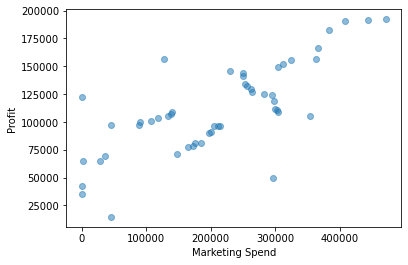

In [69]:
plt.scatter(dataset['Marketing Spend'],dataset['Profit'], alpha=0.5)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show ()

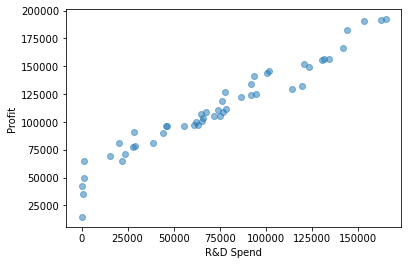

In [70]:
plt.scatter(dataset['R&D Spend'],dataset['Profit'], alpha=0.5)
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show ()

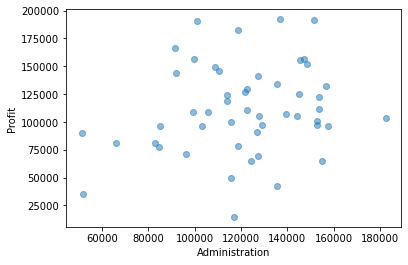

In [71]:
plt.scatter(dataset['Administration'],dataset['Profit'], alpha=0.5)
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show ()

## create the fig object

Text(0, 0.5, 'Profit')

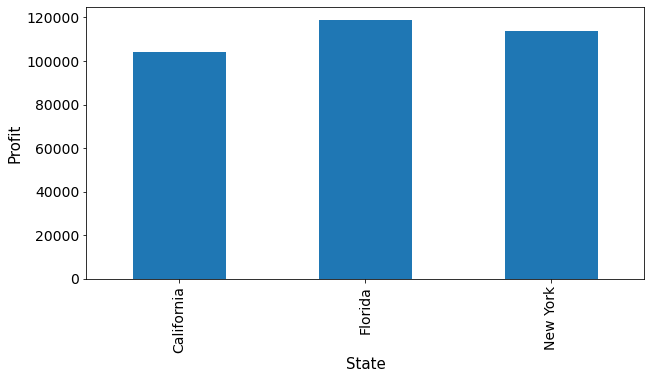

In [72]:
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar (figsize = (10,5),fontsize = 14)
ax.set_xlabel("State",fontsize=15)
ax.set_ylabel("Profit",fontsize=15)

In [73]:
dataset.State.value_counts()



New York      17
California    17
Florida       16
Name: State, dtype: int64

In [74]:
#create dummy variable for the categeorical  variable state
dataset['Newyork_State']=np.where(dataset['State']=='New york', 1, 0)
dataset['California_State']=np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State']=np.where(dataset['State']=='Florida', 1, 0)

#Drop the original column state from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [75]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,Newyork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,0,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [76]:
dependent_variable='Profit'

In [77]:
#create the list of independent varibale
independent_variable=dataset.columns.tolist()

In [78]:
independent_variable.remove(dependent_variable)

In [79]:
independent_variable

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'Newyork_State',
 'California_State',
 'Florida_State']

In [80]:
#create the data of independent variables
X=dataset[independent_variable].values
#create the dependent variable  data
Y=dataset[dependent_variable].values

In [81]:
#spliting the dataset in training set and test set
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

In [82]:
#transforming data
scaler =MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [83]:
X_test[0:10]

array([[0.39946683, 1.23448414, 0.25042853, 0.        , 0.        ,
        1.        ],
       [0.60884455, 0.38067074, 0.52936195, 0.        , 1.        ,
        0.        ],
       [0.61635061, 0.55737746, 0.48573267, 0.        , 0.        ,
        1.        ],
       [0.16869099, 0.31413763, 0.34861436, 0.        , 0.        ,
        1.        ],
       [0.92798459, 0.4685842 , 0.8646636 , 0.        , 0.        ,
        1.        ],
       [0.43609283, 0.71967718, 0.74861321, 0.        , 0.        ,
        0.        ],
       [0.12234465, 0.13781301, 0.39269043, 0.        , 0.        ,
        0.        ],
       [0.36974101, 0.95308746, 0.18698856, 0.        , 0.        ,
        0.        ],
       [0.4475048 , 0.67192074, 0.64291963, 0.        , 0.        ,
        1.        ],
       [0.85943772, 0.37692262, 0.77613557, 0.        , 0.        ,
        1.        ]])

In [84]:
#fitting the multiple linear regression to the training set
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [85]:
#predicting the test set result
Y_pred=regressor.predict(X_test)

In [86]:
math.sqrt(mean_squared_error(Y_test,Y_pred))

9137.990152794944

In [87]:
r2_score(Y_test,Y_pred)

0.9347068473282425